CREDIT CARD FRAUD DETECTION

To build a machine learning model to identify fraudulent credit card
transactions.

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset




In [ ]:
data = pd.read_csv("/content/creditcard.csv")

Viewing the dataset

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

To know about the number of rows and number of columns

In [ ]:
data.shape

(284807, 31)

# Data Cleaning

Checking null values

In [ ]:
data.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Checking duplicate values

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
284802,False
284803,False
284804,False
284805,False


In [ ]:
data.duplicated().sum()

1081

To remove duplicate entries

In [ ]:
data = data.drop_duplicates()
print(f"Number of duplicates removed: {data.duplicated().sum()}")

Number of duplicates removed: 0


In [ ]:
data.duplicated().sum()

0

# Exploratory Data Analysis

Class Distribution (Fraud vs Genuine)

In [ ]:
print("\nClass Distribution:")
class_counts = data['Class'].value_counts()
print(class_counts)


Class Distribution:
Class
0    283253
1       473
Name: count, dtype: int64


Plot Class Distribution

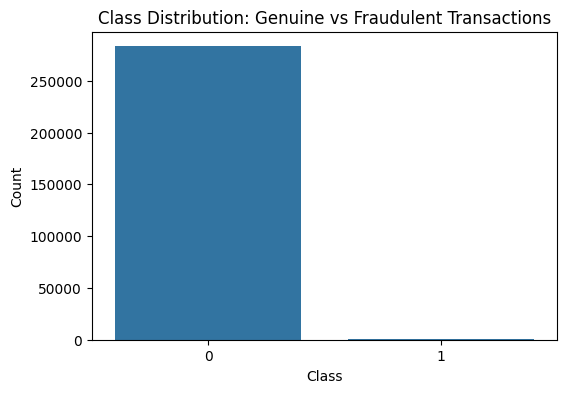

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution: Genuine vs Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Visualize Distribution of 'Amount'

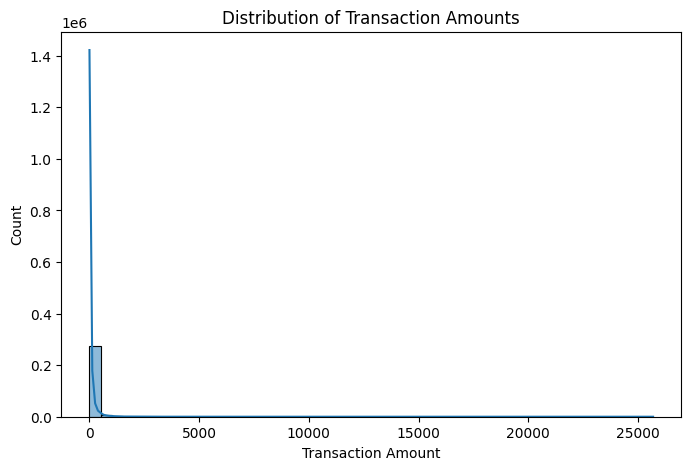

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.show()

Correlation Heatmap

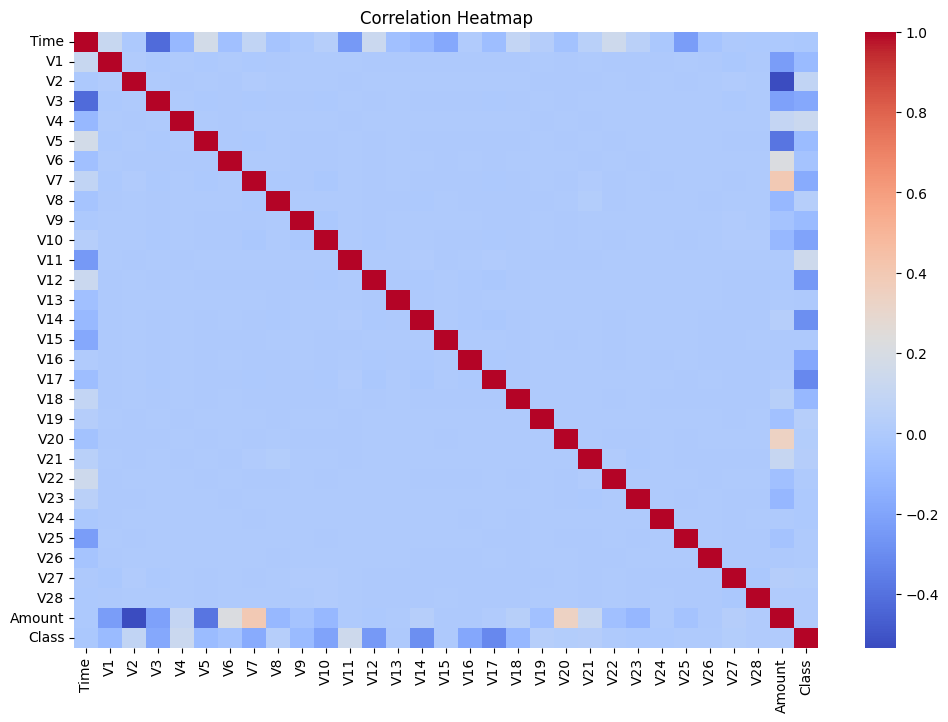

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

Scatterplot for Time vs Transaction Amount

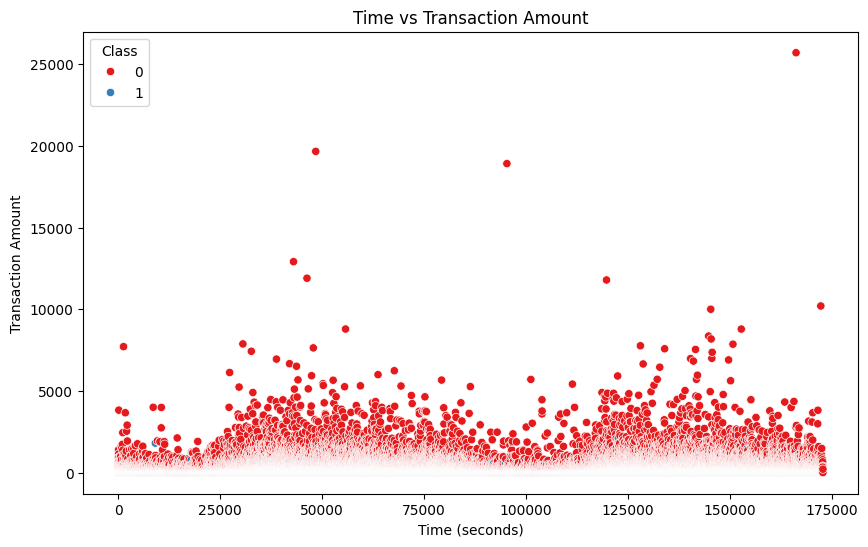

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Time', y='Amount', hue='Class', palette='Set1')
plt.title('Time vs Transaction Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

<ipython-input-16-f8171811a4fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Class', y='Amount', palette='Set3')


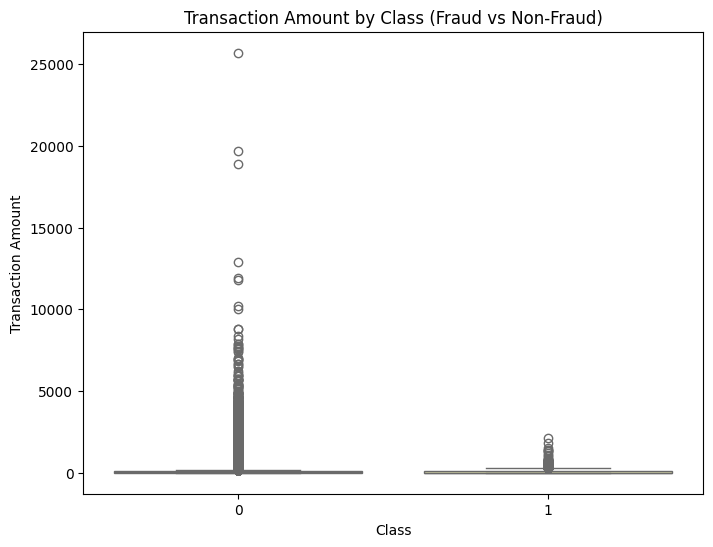

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Class', y='Amount', palette='Set3')
plt.title('Transaction Amount by Class (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

In [ ]:
import plotly.express as px
fraud = data[data['Class'] == 1]
fig = px.scatter(fraud, x='Time', y='Amount', title='Fraud Transactions Over Time', labels={'Time':'Time (seconds)', 'Amount':'Transaction Amount'})
fig.show()

<ipython-input-18-991ad5cd52e4>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




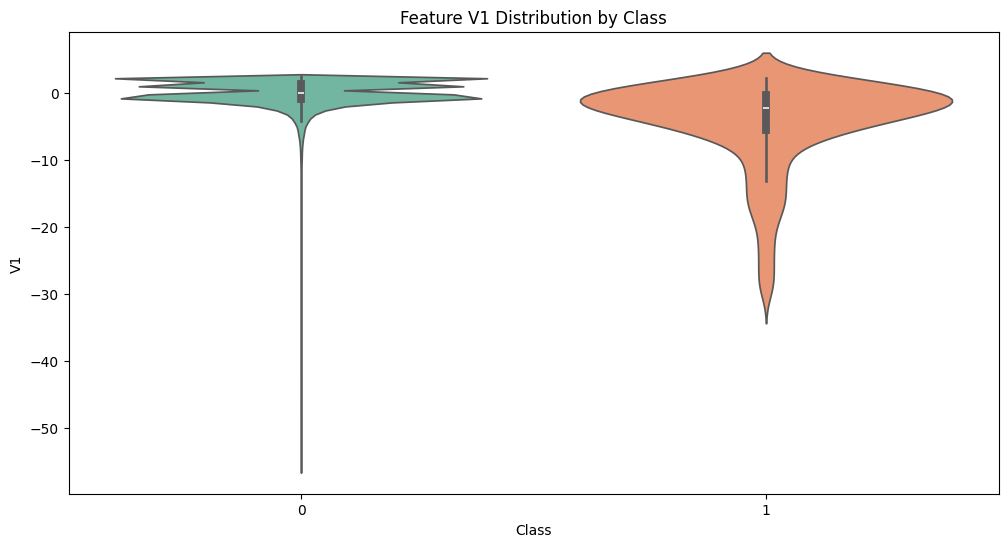

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Class', y='V1', palette='Set2')
plt.title('Feature V1 Distribution by Class')
plt.show()

# Data Preprocessing

In [ ]:
X = data.drop(['Class'], axis=1)
y = data['Class']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

Standardize 'Amount' column using StandardScaler

In [ ]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

Dropping 'Time' column as it is less relevant

In [ ]:
X = X.drop(['Time'], axis=1)

Handling Class Imbalance Using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
print("\nClass Distribution Before SMOTE:")
print(Counter(y))

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


Class Distribution Before SMOTE:
Counter({0: 283253, 1: 473})


In [ ]:
print("Class Distribution After SMOTE:")
print(Counter(y_res))

Class Distribution After SMOTE:
Counter({0: 283253, 1: 283253})


Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Model Training and Evaluation

1. Logistic Regression

In [ ]:
print("\n--- Logistic Regression ---")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_preds))


--- Logistic Regression ---

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56463
           1       0.97      0.91      0.94     56839

    accuracy                           0.94    113302
   macro avg       0.95      0.94      0.94    113302
weighted avg       0.95      0.94      0.94    113302



2. Random Forest Classifier

In [ ]:
print("\n--- Random Forest Classifier ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_preds))


--- Random Forest Classifier ---

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



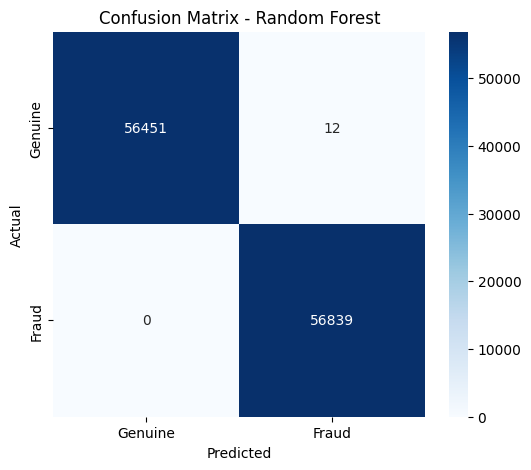

In [ ]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 5))
conf_matrix = confusion_matrix(y_test, rf_preds)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Genuine", "Fraud"], yticklabels=["Genuine", "Fraud"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

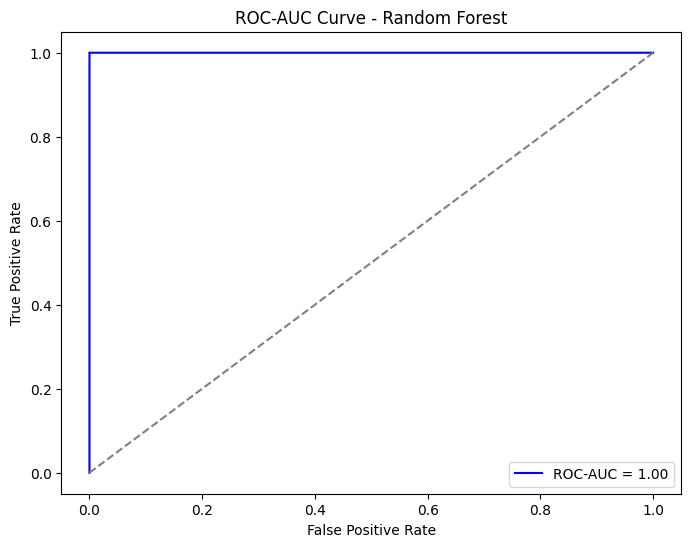

In [ ]:
# ROC-AUC Curve for Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_preds)
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC-AUC = {rf_roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title("ROC-AUC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

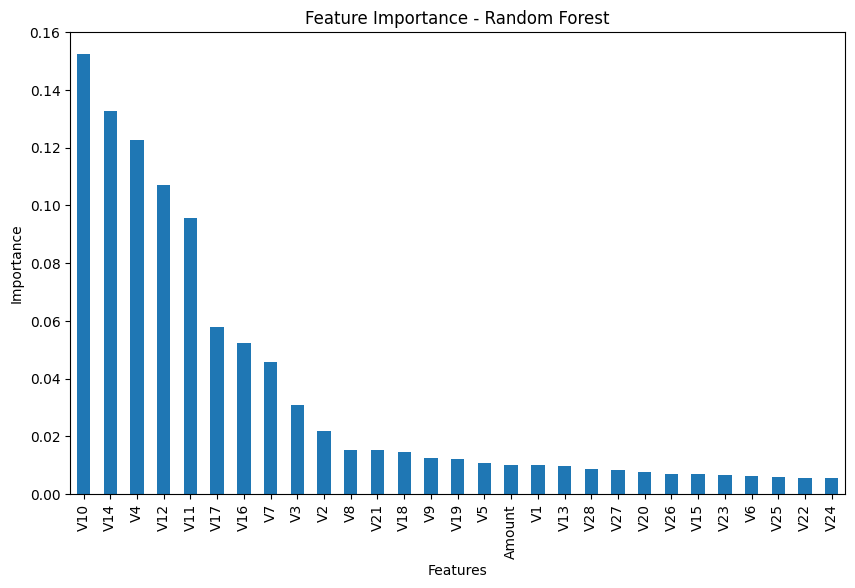

In [ ]:
# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [ ]:
user_input = {
    "V1": -1.359807, "V2": -0.072781, "V3": 2.536346, "V4": 1.378155, "V5": -0.338321,
    "V6": 0.462388, "V7": 0.239599, "V8": 0.098698, "V9": 0.363787, "V10": 0.090794,
    "V11": -0.551600, "V12": -0.617801, "V13": -0.991390, "V14": -0.311169, "V15": 1.468177,
    "V16": -0.470400, "V17": 0.207971, "V18": 0.025790, "V19": 0.403993, "V20": 0.251412,
    "V21": -0.018307, "V22": 0.277838, "V23": -0.110474, "V24": 0.066928, "V25": 0.128539,
    "V26": -0.189115, "V27": 0.133558, "V28": -0.021053, "Amount": 149.62
}

# Convert user input to DataFrame
user_input_df = pd.DataFrame([user_input])

# Preprocess 'Amount' using StandardScaler (same as training)
scaler = StandardScaler()
user_input_df['Amount'] = scaler.fit_transform(user_input_df[['Amount']])

# Make prediction
prediction = rf_model.predict(user_input_df)

# Display result
if prediction[0] == 1:
    print("⚠️ The transaction is predicted to be FRAUDULENT!")
else:
    print("✅ The transaction is predicted to be GENUINE.")

✅ The transaction is predicted to be GENUINE.


In [ ]:
def get_user_input():
    print("Please enter the following transaction details:")
    user_input = {}
    for i in range(1, 29):  # V1 to V28
        user_input[f"V{i}"] = float(input(f"Enter value for V{i}: "))
    user_input["Amount"] = float(input("Enter transaction Amount: "))
    return user_input

# Collect user input dynamically
user_input = get_user_input()

# Convert user input to DataFrame
user_input_df = pd.DataFrame([user_input])

# Preprocess 'Amount' using StandardScaler (use same scaler as training)
scaler = StandardScaler()
user_input_df['Amount'] = scaler.fit_transform(user_input_df[['Amount']])

# Make prediction
prediction = rf_model.predict(user_input_df)

# Display result
if prediction[0] == 1:
    print("\n⚠️ The transaction is predicted to be FRAUDULENT!")
else:
    print("\n✅ The transaction is predicted to be GENUINE.")


Please enter the following transaction details:
Enter value for V1: 0.4
Enter value for V2: -0.6
Enter value for V3: 0.9
Enter value for V4: 0.6
Enter value for V5: 0.1
Enter value for V6: -0.2
Enter value for V7: -0.98
Enter value for V8: 0.8
Enter value for V9: 0.7
Enter value for V10: -0.56
Enter value for V11: -0.9
Enter value for V12: 0.32
Enter value for V13: -0.43
Enter value for V14: -0.78
Enter value for V15: 0.54
Enter value for V16: 0.21
Enter value for V17: 0.1
Enter value for V18: 0.234
Enter value for V19: -0.89
Enter value for V20: 0.97
Enter value for V21: 0
Enter value for V22: 0.67
Enter value for V23: 0.82
Enter value for V24: -0.79
Enter value for V25: -0.78
Enter value for V26: -0.96
Enter value for V27: 0.84
Enter value for V28: 0.47
Enter transaction Amount: 900000

✅ The transaction is predicted to be GENUINE.
